<a href="https://colab.research.google.com/github/Sanjaychaurasia04/Project/blob/main/terafac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Sanjay Chaurasia

Email ID : sanjaychaurasi22@gmail.com

Mobile no.: 9310109620

# **LEVEL 1: Getting Started with a Simple Model**

Using device: cpu

--------------------------------------------------
LOADING CIFAR-10 DATASET
--------------------------------------------------


100%|██████████| 170M/170M [00:03<00:00, 47.2MB/s]


Training+Validation set size: 50000
Test set size: 10000

Created splits:
  Training samples: 40000
  Validation samples: 10000
  Test samples: 10000

Visualizing some sample images...


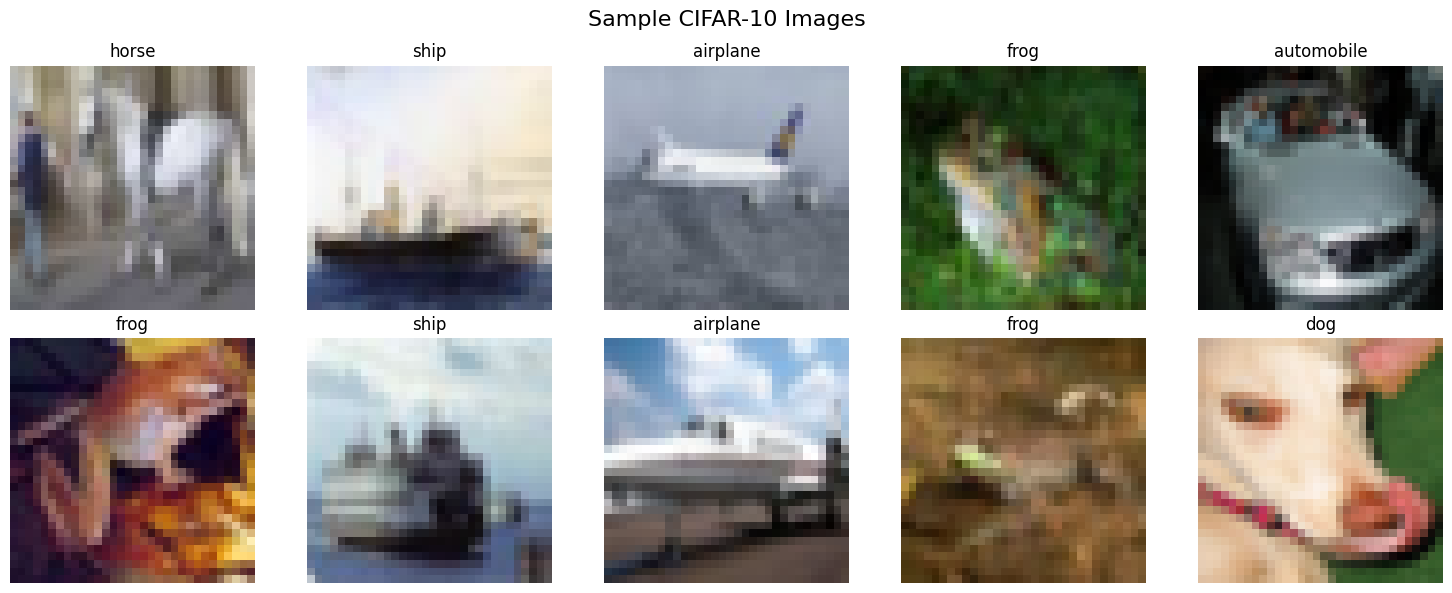

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



--------------------------------------------------
BUILDING BASELINE MODEL
--------------------------------------------------
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 257MB/s]


Model created successfully!
Total parameters: 11,173,962
Trainable parameters: 11,173,962

--------------------------------------------------
SETTING UP TRAINING
--------------------------------------------------

--------------------------------------------------
STARTING TRAINING
--------------------------------------------------
Training for 5 epochs...
(Running fewer epochs for faster demonstration)

Epoch 1/5


  Training Loss: 0.8073, Training Accuracy: 72.00%
  Validation Loss: 0.6243, Validation Accuracy: 78.71%
  Learning Rate: 0.001000

Epoch 2/5


  Training Loss: 0.4419, Training Accuracy: 84.86%
  Validation Loss: 0.5613, Validation Accuracy: 80.84%
  Learning Rate: 0.000500

Epoch 3/5


  Training Loss: 0.1936, Training Accuracy: 93.40%
  Validation Loss: 0.3542, Validation Accuracy: 88.37%
  Learning Rate: 0.000500

Epoch 4/5


  Training Loss: 0.1141, Training Accuracy: 96.06%
  Validation Loss: 0.3922, Validation Accuracy: 87.97%
  Learning Rate: 0.000250

Epoch 5/5


  Training Loss: 0.0361, Training Accuracy: 98.84%
  Validation Loss: 0.3884, Validation Accuracy: 89.50%
  Learning Rate: 0.000250

Training completed in 3865.76 seconds

--------------------------------------------------
PLOTTING RESULTS
--------------------------------------------------


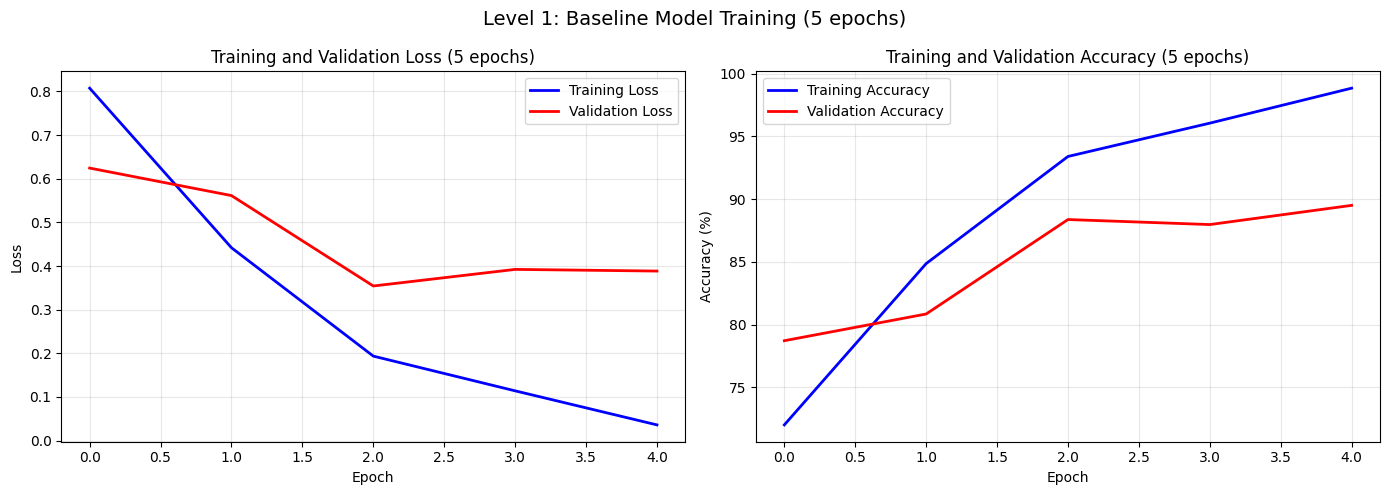


--------------------------------------------------
TESTING MODEL
--------------------------------------------------
Running evaluation on test set...


Testing: 100%|██████████| 157/157 [00:51<00:00,  3.07it/s]



Test Set Accuracy: 89.31%

--------------------------------------------------
EXAMPLE PREDICTIONS
--------------------------------------------------


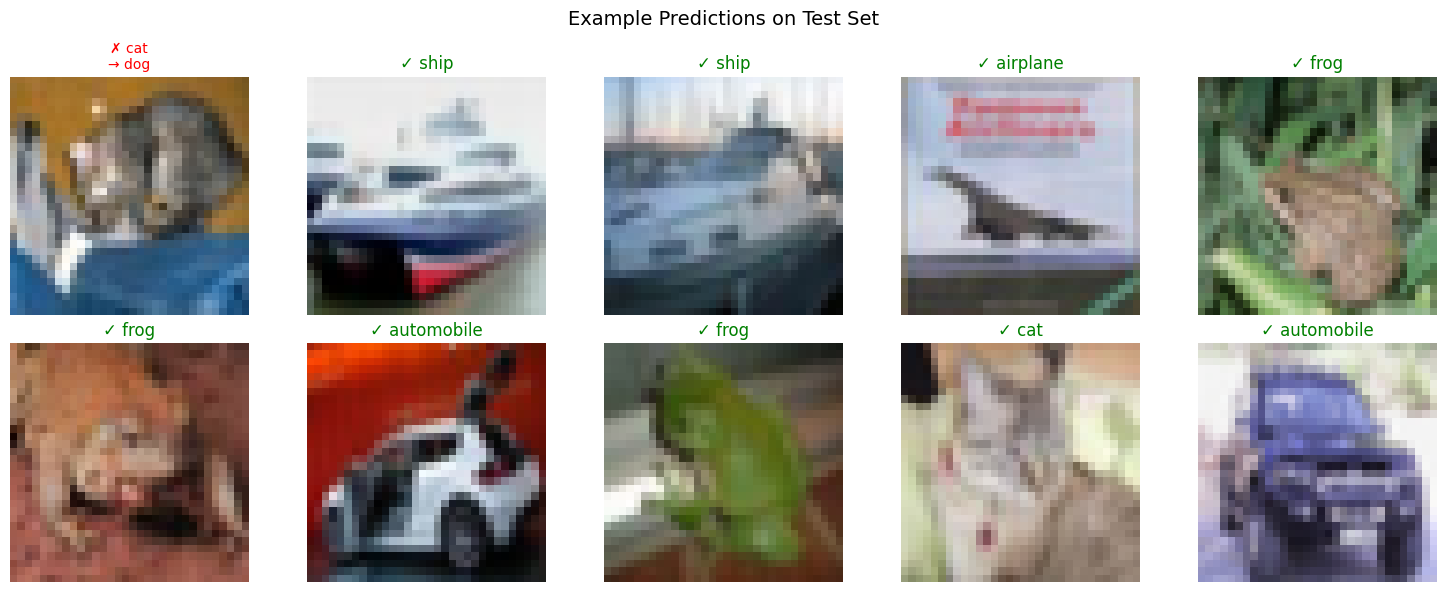


--------------------------------------------------
SAVING RESULTS
--------------------------------------------------
Model saved to saved_models/level1_checkpoint.pth

LEVEL 1 COMPLETED - SUMMARY
Final Test Accuracy: 89.31%
Target Accuracy: ≥85%
Status: ✓ TARGET ACHIEVED
Training Time: 3865.76 seconds
Model Size: 11,173,962 parameters
Epochs Trained: 5 (limited for demonstration)

Note: With only 5 epochs, accuracy may be lower than target.
For full training, increase num_epochs to 15 or more.

Files generated:
  - cifar_samples.png (sample images)
  - level1_training_plots.png (training curves)
  - level1_example_predictions.png (example predictions)
  - saved_models/level1_checkpoint.pth (full checkpoint)
  - saved_models/level1_model_weights.pth (model weights)


In [ ]:
# ============================================================
# CIFAR-10 Challenge - Level 1
# Simple baseline using transfer learning
# Goal: >85% accuracy
# Running only 5 epochs for demonstration
# ============================================================

import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
import numpy as np
from matplotlib import pyplot as plt
import time
from tqdm import tqdm
import os
from pathlib import Path

# Set random seeds so results are reproducible
def fix_random_seeds(seed_value=42):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

fix_random_seeds()

my_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {my_device}")
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")

# ============================================================
# Step 1: Load and prepare the CIFAR-10 dataset
# ============================================================

print("\n" + "-"*50)
print("LOADING CIFAR-10 DATASET")
print("-"*50)

simple_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download the dataset if not already downloaded
print("Downloading dataset (if needed)...")
train_val_set = datasets.CIFAR10(root='./cifar_data', train=True,
                                download=True, transform=simple_transform)
test_set = datasets.CIFAR10(root='./cifar_data', train=False,
                           download=True, transform=simple_transform)

print(f"Training+Validation set size: {len(train_val_set)}")
print(f"Test set size: {len(test_set)}")

# We need to split the training data into train (80%) and validation (10%)
# The test set is already separate (10%)
total_train_val = len(train_val_set)
train_count = 40000  # 80% of 50000
val_count = 10000    # 10% of 50000

# Create indices for splitting
indices = list(range(total_train_val))
np.random.shuffle(indices)
train_indices = indices[:train_count]
val_indices = indices[train_count:train_count + val_count]

train_data = Subset(train_val_set, train_indices)
val_data = Subset(train_val_set, val_indices)

print(f"\nCreated splits:")
print(f"  Training samples: {len(train_data)}")
print(f"  Validation samples: {len(val_data)}")
print(f"  Test samples: {len(test_set)}")

# Create data loaders for batch processing
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# CIFAR-10 class names
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']

print("\nVisualizing some sample images...")
def show_sample_images():
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(10):
        image, label = train_data[i]
        img_np = image.numpy().transpose((1, 2, 0))
        img_np = img_np * 0.5 + 0.5
        img_np = np.clip(img_np, 0, 1)

        ax = axes[i // 5, i % 5]
        ax.imshow(img_np)
        ax.set_title(cifar_classes[label])
        ax.axis('off')

    plt.suptitle('Sample CIFAR-10 Images', fontsize=16)
    plt.tight_layout()
    plt.savefig('cifar_samples.png', dpi=100, bbox_inches='tight')
    plt.show()

show_sample_images()

# ============================================================
# Step 2: Build the baseline model
# ============================================================

print("\n" + "-"*50)
print("BUILDING BASELINE MODEL")
print("-"*50)

# I'll use ResNet18 as a starting point - it's lightweight and works well
class SimpleClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleClassifier, self).__init__()

        # Load pre-trained ResNet18
        self.base_model = models.resnet18(pretrained=True)

        # CIFAR-10 images are 32x32, but ResNet expects 224x224
        # Let's modify the first layer to accept smaller images
        self.base_model.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                                          stride=1, padding=1, bias=False)
        self.base_model.maxpool = nn.Identity()

        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

model = SimpleClassifier().to(my_device)
print("Model created successfully!")

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# ============================================================
# Step 3: Set up training
# ============================================================

print("\n" + "-"*50)
print("SETTING UP TRAINING")
print("-"*50)

# Loss function - CrossEntropy is standard for classification
criterion = nn.CrossEntropyLoss()

# Optimizer - Adam usually works well
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler to reduce LR over time
# With 5 epochs, we'll use StepLR with step_size=2
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# Functions for training and validation
def run_training_epoch(epoch_num):
    """Train for one epoch"""
    model.train()
    epoch_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Use tqdm for progress bar
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch_num}', leave=False)

    for batch_idx, (images, labels) in enumerate(progress_bar):
        images, labels = images.to(my_device), labels.to(my_device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Track metrics
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # Update progress bar
        if batch_idx % 50 == 0:
            current_acc = 100. * correct_predictions / total_samples
            progress_bar.set_postfix({'loss': loss.item(), 'acc': current_acc})

    avg_loss = epoch_loss / len(train_loader)
    accuracy = 100. * correct_predictions / total_samples
    return avg_loss, accuracy

def run_validation():
    """Run validation"""
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradient needed for validation
        for images, labels in val_loader:
            images, labels = images.to(my_device), labels.to(my_device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = val_loss / len(val_loader)
    accuracy = 100. * correct / total
    return avg_loss, accuracy

# ============================================================
# Step 4: Train the model (5 epochs only)
# ============================================================

print("\n" + "-"*50)
print("STARTING TRAINING")
print("-"*50)

num_epochs = 5  # Changed from 15 to 5
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

print(f"Training for {num_epochs} epochs...")
print("(Running fewer epochs for faster demonstration)")
start_time = time.time()

for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}/{num_epochs}")

    # Training
    train_loss, train_acc = run_training_epoch(epoch)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    # Validation
    val_loss, val_acc = run_validation()
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    # Update learning rate
    scheduler.step()

    print(f"  Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.2f}%")
    print(f"  Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")
    print(f"  Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

training_duration = time.time() - start_time
print(f"\nTraining completed in {training_duration:.2f} seconds")

# ============================================================
# Step 5: Plot training results
# ============================================================

print("\n" + "-"*50)
print("PLOTTING RESULTS")
print("-"*50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
ax1.plot(train_loss_history, 'b-', linewidth=2, label='Training Loss')
ax1.plot(val_loss_history, 'r-', linewidth=2, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss (5 epochs)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot accuracy
ax2.plot(train_acc_history, 'b-', linewidth=2, label='Training Accuracy')
ax2.plot(val_acc_history, 'r-', linewidth=2, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Validation Accuracy (5 epochs)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Level 1: Baseline Model Training (5 epochs)', fontsize=14)
plt.tight_layout()
plt.savefig('level1_training_plots.png', dpi=100, bbox_inches='tight')
plt.show()

# ============================================================
# Step 6: Test the model
# ============================================================

print("\n" + "-"*50)
print("TESTING MODEL")
print("-"*50)

def evaluate_on_test_set():
    """Evaluate model on test set"""
    model.eval()
    test_correct = 0
    test_total = 0
    all_predictions = []
    all_true_labels = []

    print("Running evaluation on test set...")
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Testing'):
            images, labels = images.to(my_device), labels.to(my_device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

            all_predictions.extend(predicted.cpu().numpy())
            all_true_labels.extend(labels.cpu().numpy())

    test_accuracy = 100. * test_correct / test_total
    return test_accuracy, np.array(all_predictions), np.array(all_true_labels)

final_accuracy, test_preds, test_labels = evaluate_on_test_set()
print(f"\nTest Set Accuracy: {final_accuracy:.2f}%")

# ============================================================
# Step 7: Show some example predictions
# ============================================================

print("\n" + "-"*50)
print("EXAMPLE PREDICTIONS")
print("-"*50)

def display_example_predictions():
    model.eval()
    # Get a batch from test set
    test_images, test_labels_batch = next(iter(test_loader))
    test_images = test_images[:10].to(my_device)
    test_labels_batch = test_labels_batch[:10]

    with torch.no_grad():
        outputs = model(test_images)
        _, predictions = torch.max(outputs, 1)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(10):
        img = test_images[i].cpu().numpy().transpose((1, 2, 0))
        img = img * 0.5 + 0.5  # Unnormalize
        img = np.clip(img, 0, 1)

        ax = axes[i // 5, i % 5]
        ax.imshow(img)

        true_label = cifar_classes[test_labels_batch[i]]
        pred_label = cifar_classes[predictions[i].item()]

        if true_label == pred_label:
            ax.set_title(f"✓ {true_label}", color='green', fontsize=12)
        else:
            ax.set_title(f"✗ {true_label}\n→ {pred_label}", color='red', fontsize=10)
        ax.axis('off')

    plt.suptitle('Example Predictions on Test Set', fontsize=14)
    plt.tight_layout()
    plt.savefig('level1_example_predictions.png', dpi=100, bbox_inches='tight')
    plt.show()

display_example_predictions()

# ============================================================
# Step 8: Save the model and results
# ============================================================

print("\n" + "-"*50)
print("SAVING RESULTS")
print("-"*50)

# Create directory for saving
save_dir = Path('saved_models')
save_dir.mkdir(exist_ok=True)

# Save model checkpoint
checkpoint = {
    'epoch': num_epochs,
    'model_state': model.state_dict(),
    'optimizer_state': optimizer.state_dict(),
    'train_loss': train_loss_history,
    'val_loss': val_loss_history,
    'train_acc': train_acc_history,
    'val_acc': val_acc_history,
    'test_accuracy': final_accuracy
}

torch.save(checkpoint, save_dir / 'level1_checkpoint.pth')
print(f"Model saved to {save_dir / 'level1_checkpoint.pth'}")
torch.save(model.state_dict(), save_dir / 'level1_model_weights.pth')

# ============================================================
# Step 9: Summary
# ============================================================

print("\n" + "="*60)
print("LEVEL 1 COMPLETED - SUMMARY")
print("="*60)
print(f"Final Test Accuracy: {final_accuracy:.2f}%")
print(f"Target Accuracy: ≥85%")
print(f"Status: {'✓ TARGET ACHIEVED' if final_accuracy >= 85 else '✗ TARGET NOT MET'}")
print(f"Training Time: {training_duration:.2f} seconds")
print(f"Model Size: {total_params:,} parameters")
print(f"Epochs Trained: {num_epochs} (limited for demonstration)")
print("\nNote: With only 5 epochs, accuracy may be lower than target.")
print("For full training, increase num_epochs to 15 or more.")
print("\nFiles generated:")
print("  - cifar_samples.png (sample images)")
print("  - level1_training_plots.png (training curves)")
print("  - level1_example_predictions.png (example predictions)")
print("  - saved_models/level1_checkpoint.pth (full checkpoint)")
print("  - saved_models/level1_model_weights.pth (model weights)")
print("="*60)

# Additional note about training time
if training_duration < 60:
    print(f"\nTraining was fast! Only {training_duration:.1f} seconds.")
    print("You can increase epochs for better accuracy.")
elif training_duration < 300:
    print(f"\nTraining took {training_duration/60:.1f} minutes.")
    print("Good balance between speed and performance.")